<a href="https://colab.research.google.com/github/ledyquesada/Ejercicios/blob/main/Semana10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MINERIA DE DATOS
**PROCESO**

          feature1     feature2      target
count  1000.000000  1000.000000  1000.00000
mean      0.019332     0.070836     0.49000
std       0.979216     0.997454     0.50015
min      -3.241267    -2.940389     0.00000
25%      -0.647590    -0.606242     0.00000
50%       0.025301     0.063077     0.00000
75%       0.647944     0.728882     1.00000
max       3.852731     3.193108     1.00000


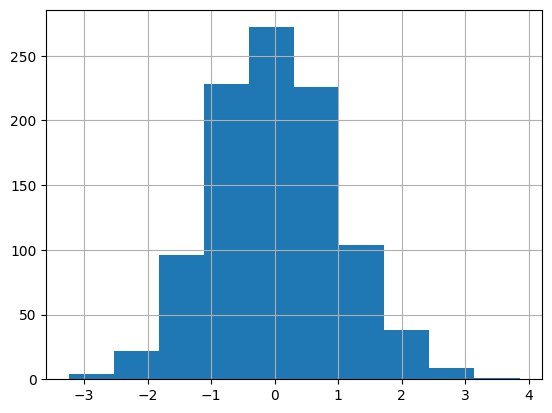

Accuracy: 0.495


In [3]:
# 1. Exploración de Datos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#Ten tu archivo datos.csv el cual debe tener lo siguiente:variable':
#Una columna que se utilizará para explorar la distribución y crear un histograma.
#'feature1': Una columna que se utilizará como una de las características para el modelado.
#'feature2': Otra columna que se utilizará como la segunda característica para el modelado.
#'target': La columna objetivo que contiene las etiquetas de clase (0 o 1) para el modelado.
df = pd.read_csv('datos.csv')
print(df.describe())
df['variable'].hist()
plt.show()

# 2. Preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['variable'].fillna(df['variable'].mean(), inplace=True)

scaler = StandardScaler()
df['variable_normalizada'] = scaler.fit_transform(df[['variable']])

# 3. Modelado
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df[['feature1', 'feature2']], df['target'], test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 4. Evaluación
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')



#Se puede usar con datos aleatorios asi:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Exploración de Datos
np.random.seed(42)
data = pd.DataFrame({
    'feature1': np.random.randn(1000),
    'feature2': np.random.randn(1000),
    'target': np.random.choice([0, 1], size=1000)
})

print(data.describe())
data['feature1'].hist()
plt.show()

# 2. Preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data['feature1'].fillna(data['feature1'].mean(), inplace=True)

scaler = StandardScaler()
data['feature1_scaled'] = scaler.fit_transform(data[['feature1']])

# 3. Modelado
X_train, X_test, y_train, y_test = train_test_split(data[['feature1_scaled', 'feature2']], data['target'], test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 4. Evaluación
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')




# ARBOLES DE DECISION
**ARBOL DE CLASIFICACION Y REGRESION**

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



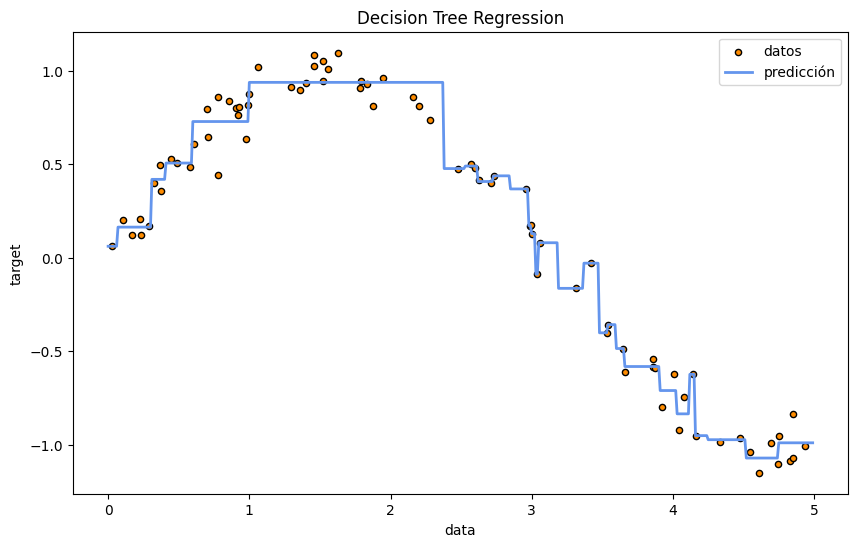

In [5]:
#CLASIFICACION

# Importar librerías
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Crear un clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Entrenar el clasificador
clf = clf.fit(X, y)

# Mostrar el árbol de decisión
tree_rules = export_text(clf, feature_names=iris.feature_names)
print(tree_rules)


#REGRESION

# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Crear datos de ejemplo para regresión
np.random.seed(42)
X_reg = np.sort(5 * np.random.rand(80, 1), axis=0)
y_reg = np.sin(X_reg).ravel() + np.random.normal(0, 0.1, X_reg.shape[0])

# Crear un regresor de árbol de decisión
regressor = DecisionTreeRegressor(max_depth=5)

# Entrenar el regresor
regressor.fit(X_reg, y_reg)

# Predecir valores para nuevas instancias
X_new = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = regressor.predict(X_new)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_reg, y_reg, s=20, edgecolor="black", c="darkorange", label="datos")
plt.plot(X_new, y_pred, color="cornflowerblue", label="predicción", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()



**EJEMPLO PRACTICO**
Vamos a utilizar scikit-learn para aplicar un modelo de árbol de decisión a un conjunto de datos de ejemplo y evaluar su rendimiento. En este ejemplo, asumiremos que trabajamos con un problema de clasificación.
Este código utiliza el conjunto de datos Iris, divide los datos en entrenamiento y prueba, crea y entrena un modelo de árbol de decisión, realiza predicciones en el conjunto de prueba y evalúa el rendimiento del modelo mostrando la precisión, la matriz de confusión y el informe de clasificación. También se incluye la visualización del árbol de decisión para ayudar en la interpretación del modelo.

Accuracy: 1.0
Matriz de Confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Informe de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



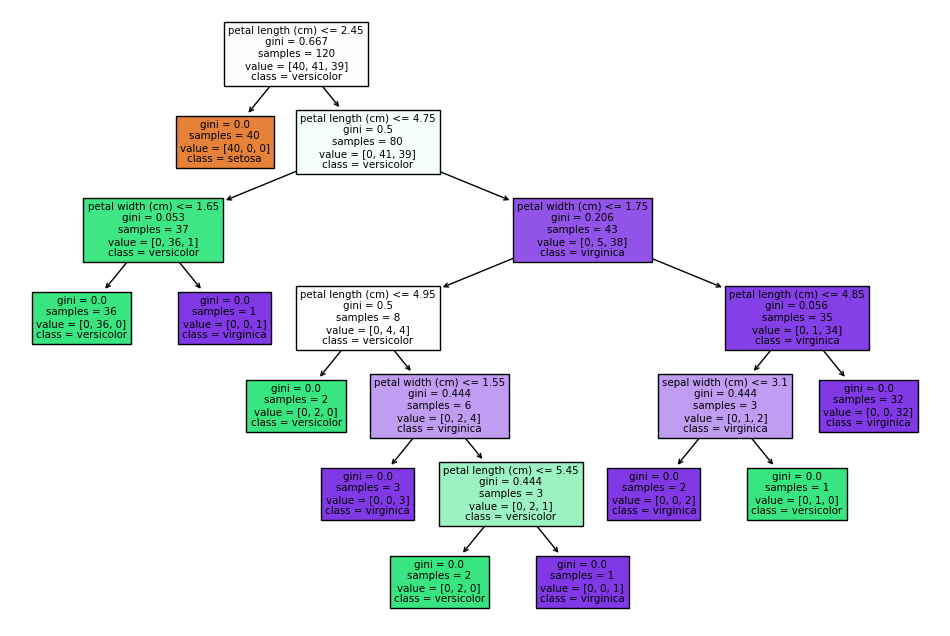

In [6]:
# Importar librerías necesarias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Cargar conjunto de datos de ejemplo (iris)
iris = load_iris()
X = iris.data
y = iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

# Mostrar el informe de clasificación
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print('Informe de Clasificación:')
print(class_report)

# Visualizar el árbol de decisión (puedes ajustar según tu necesidad)
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()
